<a href="https://colab.research.google.com/github/ric4234/AI-Fridays/blob/main/Analisi%20Di%20Immagini/05_Multimodal_Visual_Question_Answering.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visual Question & Answering





In [1]:
!pip install transformers

In [2]:
from transformers.utils import logging
logging.set_verbosity_error()

import warnings
warnings.filterwarnings("ignore", message="Using the model-agnostic default `max_length`")

In [3]:
from transformers import BlipForQuestionAnswering
model = BlipForQuestionAnswering.from_pretrained(
    "Salesforce/blip-vqa-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

In [4]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-vqa-base")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

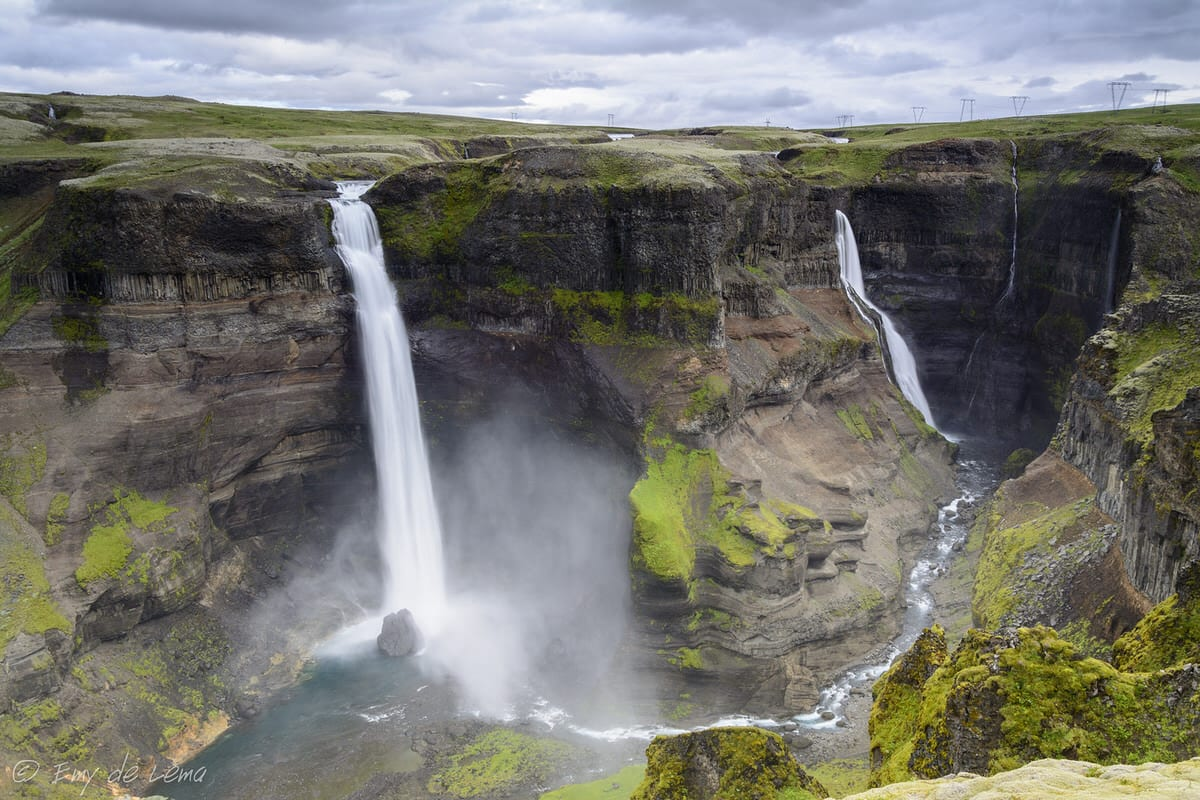

In [35]:
from PIL import Image
import requests
from io import BytesIO

# Fetch image from URL
url = 'https://nonsoloturisti.it/wp-content/uploads/2016/09/Islanda.jpg'  # Replace with your image URL
response = requests.get(url)
image = Image.open(BytesIO(response.content))
image

In [40]:
question = "How many waterfalls do you see in the picture?"

In [41]:
inputs = processor(image, question, return_tensors="pt")

In [42]:
out = model.generate(**inputs)

In [43]:
print(processor.decode(out[0], skip_special_tokens=True))

2
